<a href="https://colab.research.google.com/github/arnauddyevre/mres_paper/blob/master/Markups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code used for the simulation of my MRes paper (EC599)

In [0]:
#Necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import scipy.optimize as opt

In [2]:
prod_trials = 50+1

p_x = np.zeros(prod_trials)
c_x = np.zeros(prod_trials)
mu_x = np.zeros(prod_trials)
time = np.zeros(prod_trials)
time

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
ρ = 7.5
η = 4.55

for s in range(1, prod_trials):
  def f(variables):
    (x, y, z, w, v) = variables
    first_eq = x - (1 / (1 - (1/ρ)*(1 - ((x**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ))) - (1/η)*((x**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ))  ))*2.81149*(1./s )
    second_eq = y - (1 / (1 - (1/ρ)*(1 - ((y**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ))) - (1/η)*((y**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ))  ))*2.81149
    third_eq = z - (1 / (1 - (1/ρ)*(1 - ((z**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ))) - (1/η)*((z**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ) )  ))*2.81149
    fourth_eq = w - (1 / (1 - (1/ρ)*(1 - ((w**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ))) - (1/η)*((w**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ) )  ))*2.81149
    fifth_eq = v - (1 / (1 - (1/ρ)*(1 - ((v**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ))) - (1/η)*((v**(1-ρ))/(x**(1-ρ) + y**(1-ρ) + z**(1-ρ) + w**(1-ρ) + v**(1-ρ) ) )  ))*2.81149
    return [first_eq, second_eq, third_eq, fourth_eq, fifth_eq]

  solution = opt.fsolve(f, (1., 1., 1., 1., 1.))
  solution
  p_x[s] = solution[0]
  c_x[s] = 2.81149*(1./s ) 
  mu_x[s] =  p_x[s]/c_x[s]
  time[s] = s 

In [4]:
solution

array([0.07206918, 3.24402692, 3.24402692, 3.24402692, 3.24402692])

In [5]:
p_x

array([0.        , 3.31006025, 1.78674935, 1.20032857, 0.90076845,
       0.72067371, 0.60057189, 0.51477841, 0.45043184, 0.40038411,
       0.3603458 , 0.32758713, 0.30028823, 0.27718914, 0.25738992,
       0.2402306 , 0.22521619, 0.21196818, 0.20019217, 0.18965574,
       0.18017295, 0.17159329, 0.16379359, 0.15667213, 0.15014413,
       0.14413836, 0.13859458, 0.13346144, 0.12869496, 0.12425721,
       0.1201153 , 0.11624061, 0.11260809, 0.10919573, 0.10598409,
       0.10295597, 0.10009608, 0.09739078, 0.09482787, 0.09239638,
       0.09008648, 0.08788924, 0.08579664, 0.08380137, 0.0818968 ,
       0.08007687, 0.07833607, 0.07666934, 0.07507206, 0.07353998,
       0.07206918])

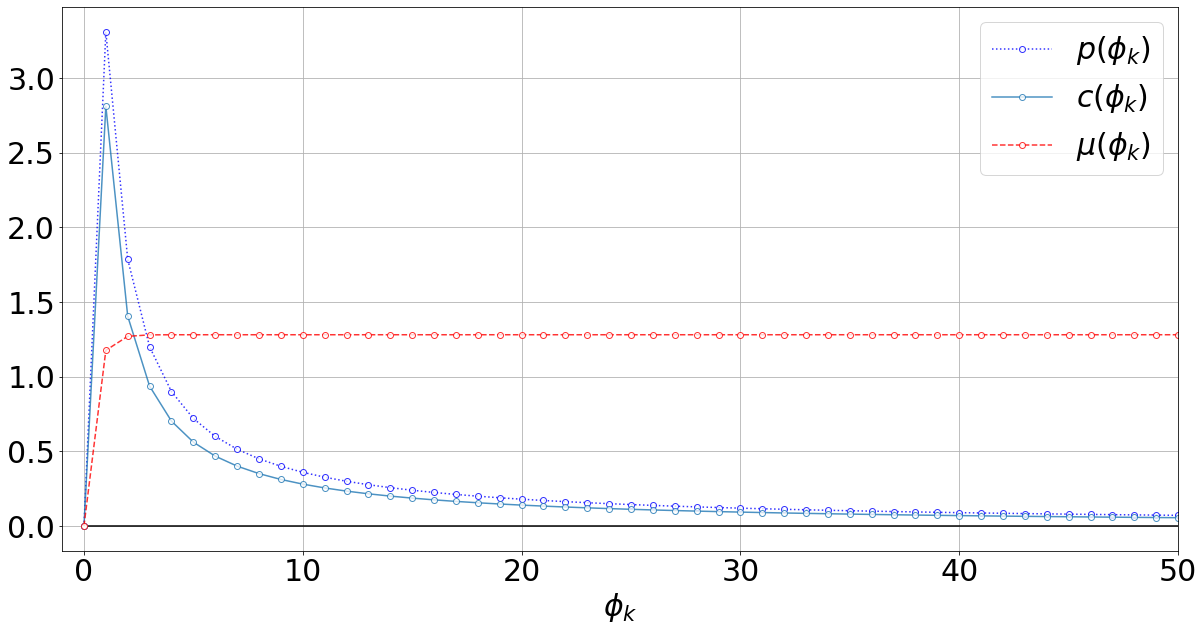

In [13]:
plt.figure(1, figsize=(20,10))
#plt.title("Impulse responses to $a_1 = 1.01$")
plt.rcParams.update({'font.size': 30})

plt.plot(time, p_x, 'b:', alpha=0.8, marker='o', fillstyle='full', markerfacecolor='white', label='$p(\phi_k)$')
plt.plot(time, c_x, alpha=0.8, marker='o', fillstyle='full', markerfacecolor='white', label='$c(\phi_k)$')
plt.plot(time, mu_x, 'r--', alpha=0.8, marker='o', fillstyle='full', markerfacecolor='white', label='$\mu(\phi_k)$')
plt.xlabel("$\phi_k$" "")
plt.legend()
plt.grid()
plt.hlines(0, 0, 50)
plt.xlim(-1, 50)
plt.legend(loc=1, prop={'size': 30})
#plt.ylim(0.998, 1.006)
plt.savefig("test_graph.pdf")